In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def zero_pad(x, pad):
    """Pad with zeros all images of the dataset x"""
    
    x_pad = np.pad(x, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values=0)
    return x_pad

x.shape (4, 3, 3, 2)
x_pad.shape (4, 7, 7, 2)


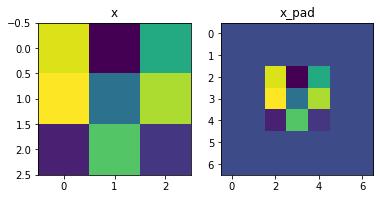

In [19]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print(f'x.shape {x.shape}')
print(f'x_pad.shape {x_pad.shape}')

fig, ax = plt.subplots(1, 2)
ax[0].set_title('x')
ax[0].imshow(x[0,:,:,0])
ax[1].set_title('x_pad')
ax[1].imshow(x_pad[0,:,:,0])

In [32]:
def conv_single_step(a, w, b):
    """
    Apply filter defined by parameters w on a single slice
    of the output activation of previous layer.
    """
    s = np.multiply(a, w) + b
    z = np.sum(s)
    return z

In [33]:
np.random.seed(1)
a = np.random.randn(4, 4, 3)
w = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)


z = conv_single_step(a, w, b)
print(f'z is {z}')

z is -23.16021220252078


In [51]:
def convolution_operation(a, w, b, parameters):
    """
    Convolution operation on previous input layer 'a' 
    """
    n, v_prev, h_prev, c_prev = a.shape
    f, f, c_prev, c_f = w.shape
    
    stride = parameters['stride']
    pad = parameters['pad']
    
    o_v = int((v_prev -f + 2*pad) / stride) + 1
    o_h = int((h_prev -f + 2*pad) / stride) + 1
    
    z = np.zeros((n, o_v, o_h, c_f))
    a_pad = zero_pad(a, pad)
    
    for i in range(n):
        current_a = a_pad[i]
        for v in range(o_v):
            for h in range(o_h):
                for c in range(c_f):
                    
                    vert_start = v * stride
                    vert_end = vert_start + f
                    horiz_start = h * stride
                    horiz_end = horiz_start + f 
                    
                    current_a_slice = current_a[vert_start:vert_end, horiz_start:horiz_end, :]
                    z[i, v, h, c] = conv_single_step(current_a_slice, w[...,c], b[...,c])
                    
    assert(z.shape == (n, o_v, o_h, c_f))
    
    cache = (a_prev, w, b, parameters)
    return z, cache



In [52]:
np.random.seed(1)
a_prev = np.random.randn(10, 4, 4, 3)
w = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
parameters = {"pad":2, "stride":1}

z, cache_conv = convolution_operation(a_prev, w, b, parameters)
print(f'Z means is {np.mean(z)}')
"""
Finally, CONV layer should also contain an activation, in which case we would add the following line of code:
A[i, h, w, c] = activation(Z[i, h, w, c])
"""

Z means is 0.15585932488906465


'\nFinally, CONV layer should also contain an activation, in which case we would add the following line of code:\nA[i, h, w, c] = activation(Z[i, h, w, c])\n'

In [58]:
def pooling_operation(a, parameters, mode='max'):
    """
    Pooling operation on given previous input layer 'a'
    """
    n, v_prev, h_prev, c_prev = a.shape
    f = parameters['f']
    stride = parameters['stride']
    
    o_v = int(1 + (v_prev-f) / stride)
    o_h = int(1 + (h_prev-f) / stride)
    c_f = c_prev
    
    z = np.zeros((n, o_v, o_h, c_f))
    
    for i in range(n):
        for v in range(o_v):
            for h in range(o_h):
                for c in range(c_f):
                    
                    vert_start = v * stride
                    vert_end = vert_start + f
                    horiz_start = h * stride
                    horiz_end = horiz_start + f
                    
                    a_prev_slice = a[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    if mode == 'max':
                        z[i, v, h, c] = np.max(a_prev_slice)
                    elif mode == 'average':
                        z[i, v, h, c ] = np.mean(a_prev_slice)
    cache = a, parameters 
    return z, cache


In [66]:
np.random.seed(1)
a_prev = np.random.randn(2, 4, 4, 3)
parameters = {"stride":1, "f":4}

a_output, cache = pooling_operation(a_prev, parameters)
print('Max Pooling')
print(a_output)
print('\n')
print('Average Pooling')
a_output, cache = pooling_operation(a_prev, parameters, mode='average')
print(a_output)

Max Pooling
[[[[1.74481176 1.6924546  2.10025514]]]


 [[[1.19891788 1.51981682 2.18557541]]]]


Average Pooling
[[[[-0.09498456  0.11180064 -0.14263511]]]


 [[[-0.09525108  0.28325018  0.33035185]]]]
